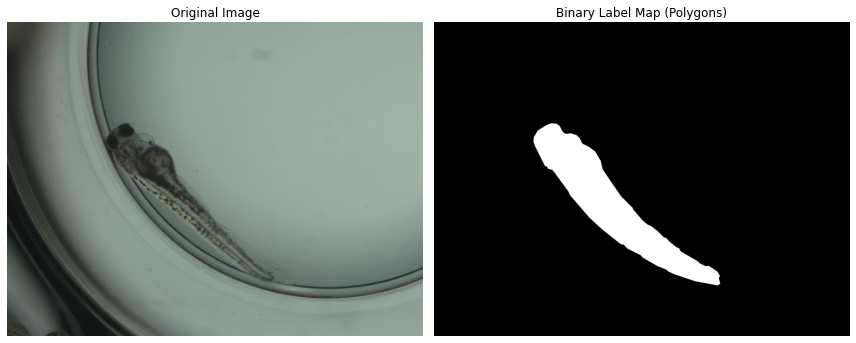

In [5]:
import os
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def parse_voc_polygon(xml_path, image_size):
    """
    Parse the Pascal VOC XML file to create a binary mask using polygon data.
    
    Args:
        xml_path (str): Path to the .xml file.
        image_size (tuple): Size of the image (width, height).

    Returns:
        Image: Binary label map as a PIL image.
    """
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Create an empty binary mask
    width, height = image_size
    mask = Image.new("1", (width, height), 0)  # "1" for binary image

    draw = ImageDraw.Draw(mask)

    # Parse all objects in the XML file
    for obj in root.findall("object"):
        polygon = obj.find("polygon")
        if polygon is not None:
            points = []
            for i in range(1, 100):  # We assume there won't be more than 100 points
                x_tag = f"x{i}"
                y_tag = f"y{i}"
                x = polygon.find(x_tag)
                y = polygon.find(y_tag)
                if x is not None and y is not None:
                    points.append((int(float(x.text)), int(float(y.text))))
                else:
                    break

            # Draw the polygon on the binary mask
            draw.polygon(points, outline=1, fill=1)

    return mask

def display_images_with_polygons(image_path, xml_path):
    """
    Display the original image and its polygon-based binary label map side by side.

    Args:
        image_path (str): Path to the .jpg image file.
        xml_path (str): Path to the corresponding .xml file.
    """
    # Load the original image
    original_image = Image.open(image_path)
    image_size = original_image.size  # (width, height)

    # Parse the XML and create a binary label map
    binary_label_map = parse_voc_polygon(xml_path, image_size)

    # Display the images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(binary_label_map, cmap="gray")
    axes[1].set_title("Binary Label Map (Polygons)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()

# Example usage
file_path = "Zebra_fish_data/test_data_withxml"  # Replace with your directory path
for file_name in os.listdir(file_path):
    if file_name.endswith(".jpg"):
        # Match the .xml file with the same name
        base_name = os.path.splitext(file_name)[0]
        image_path = os.path.join(file_path, f"{base_name}.jpg")
        xml_path = os.path.join(file_path, f"{base_name}.xml")

        if os.path.exists(xml_path):
            display_images_with_polygons(image_path, xml_path)
        else:
            print(f"Warning: No matching XML file for {image_path}")
